In [1]:
from astropy.timeseries import LombScargle
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from periodogram_selfcalib_tools import *

In [2]:
# general plot params
params = {'legend.fontsize': 22,
          'legend.handlelength': 2,
          'axes.titlesize' : 24,
          'axes.labelsize' : 24,
          'axes.formatter.use_mathtext' : True,   #ensures ticks follow math format. actually this doesn't work. We'll doit another time
          'xtick.labelsize' : 16,
          'ytick.labelsize' : 16,
          'font.family' : 'serif',
          #'font.serif' : 'cm',
          #'text.usetex' : True,
          'mathtext.fontset' : 'cm',
          
          'savefig.format' : 'pdf',
         
         }
plt.rcParams.update(params)

In [8]:
# INPUT
len_t = 100
n_batch = 1
squash = 1
fbg = 1      # fixed batch gap
fib = 1
fminT = 0.5  #*10  # choose frequency cut
noise_type = 'poisson'
power_method = 'slow_Df'
normalization = 'psd'    # psd for chi2/2, standard for chi0 normalization (0<1) 
spp = 50
Nseeds = int(1e3)
dealias = 0
nterms = 1
M = 3

vdPfig1_T = None # 1961
 
#folder = get_foldername(len_t, n_batch, squash, fbg, fib, fminT, power_method, normalization, spp, Nseeds, dealias, nterms, M, dk, A, vdPfig1_T)

In [9]:
dks = [0, 0.5, 1, 2, 5, 10, 100]#, 200, 500, 1000, 2000, 5000][::2]
As = [0, 0.5]
peak_removal_df = 2.5

A= 0
Mean qL =  [2.11644975]
A= 0
Mean qL =  [2.11644975]
A= 0
Mean qL =  [2.11644975]
A= 0
Mean qL =  [2.11644975]
A= 0
Mean qL =  [2.11644975]
A= 0
Mean qL =  [2.11644975]
A= 0
Mean qL =  [2.11644975]
A= 0.5
Mean qL =  [12.8366164]
A= 0.5
Mean qL =  [12.8366164]
A= 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


0.5
Mean qL =  [12.8366164]
A= 0.5
Mean qL =  [12.8366164]
A= 0.5
Mean qL =  [12.8366164]
A= 0.5
Mean qL =  [12.8366164]
A= 0.5
Mean qL =  [12.8366164]


No handles with labels found to put in legend.


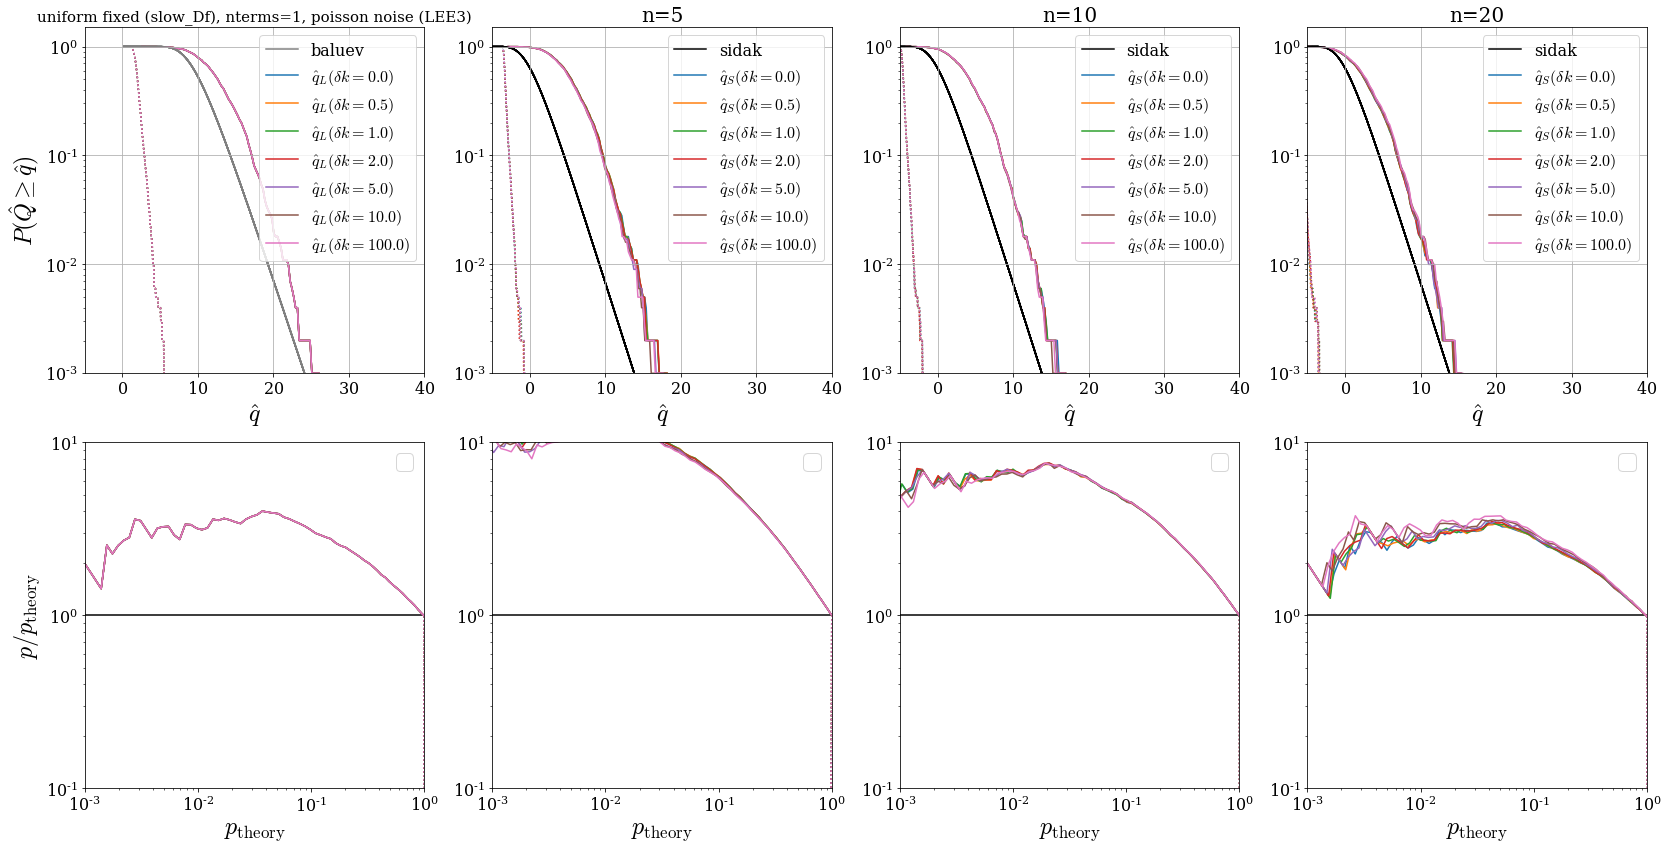

In [10]:
plot_CCDF_LEE3(len_t, n_batch, squash, fbg, fib, fminT, power_method, normalization, spp, Nseeds, dealias, nterms, M, dks=dks, As=As, peak_removal_df=peak_removal_df, noise_type=noise_type, ax=None, ymin=1e-3, vdPfig1_T=None)
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


bins [-8.29922852 -8.27148953 -8.24375055 ... 19.38427913 19.41201811
 19.4397571 ]
A= 0
Mean qL =  [2.11644975]
A= 0
Mean qL =  [2.11644975]
A= 0
Mean qL =  [2.11644975]
A= 0
Mean qL =  [2.11644975]
A= 0
Mean qL =  [2.11644975]
A= 0
Mean qL =  [2.11644975]
A= 0
Mean qL =  [2.11644975]
A= 0.5
Mean qL =  [12.8366164]
A= 0.5
Mean qL =  [12.8366164]
A= 0.5
Mean qL =  [12.8366164]
A= 0.5
Mean qL =  [12.8366164]
A= 0.5
Mean qL =  [12.8366164]
A= 0.5
Mean qL =  [12.8366164]
A= 0.5
Mean qL =  [12.8366164]


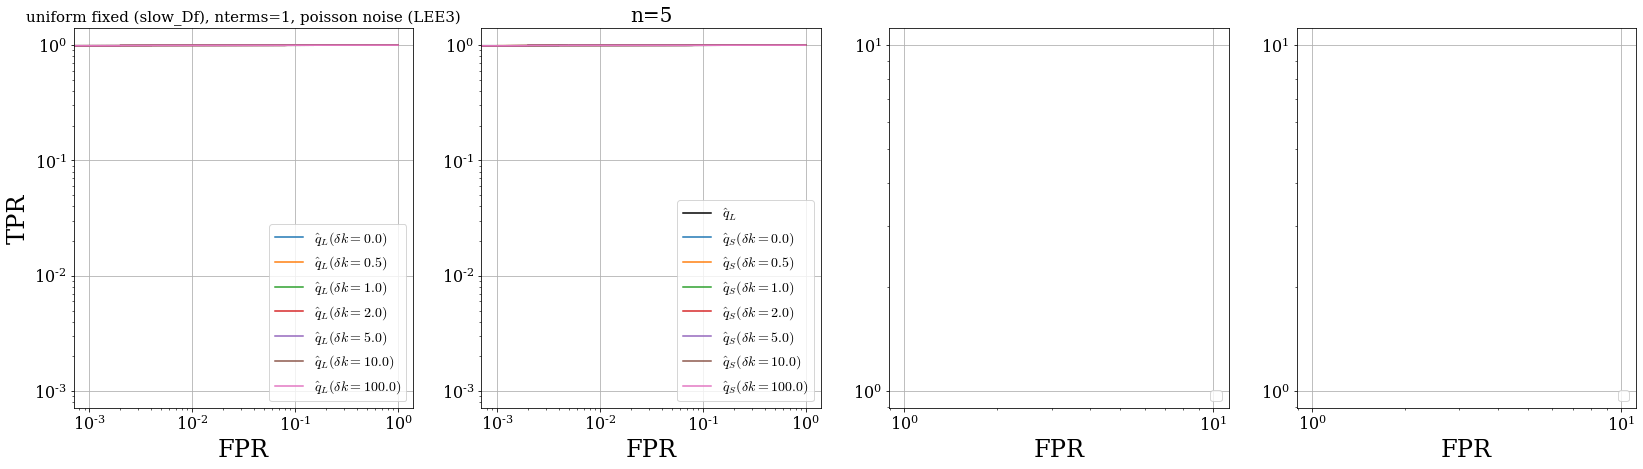

In [11]:
ROC_LEE3(len_t, n_batch, squash, fbg, fib, fminT, power_method, normalization, spp, Nseeds, dealias, nterms, M, dks=dks, As=As, peak_removal_df=peak_removal_df, noise_type=noise_type, ax=None, ymin=1e-3, vdPfig1_T=None)
plt.show()

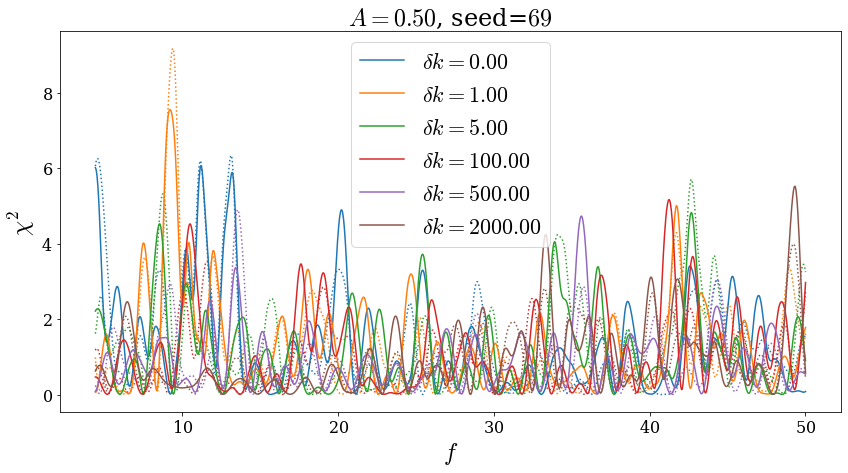

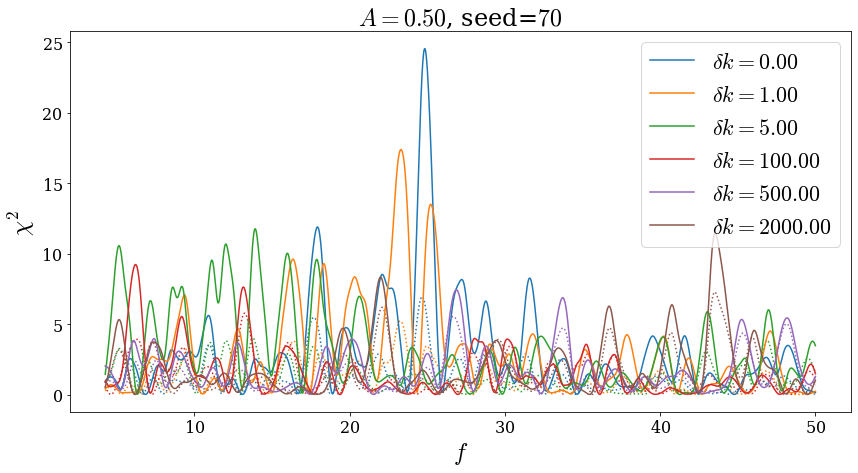

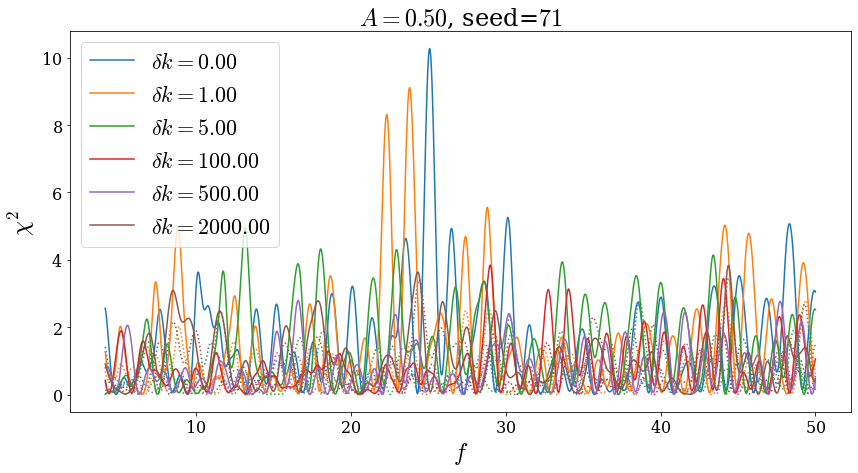

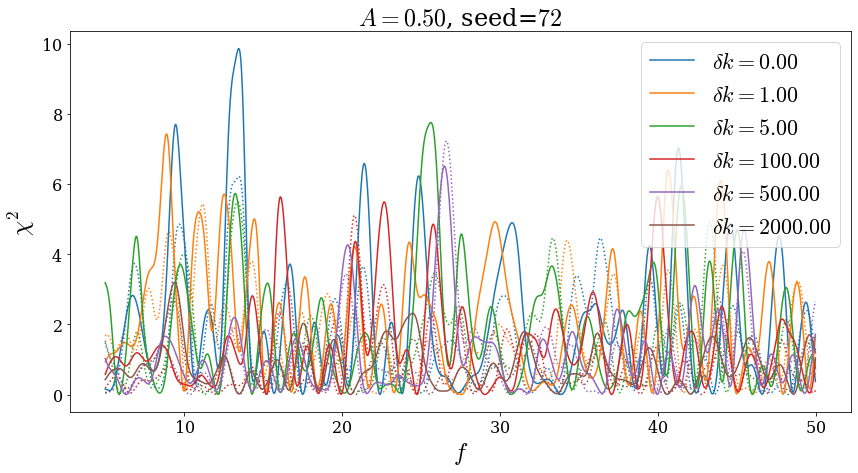

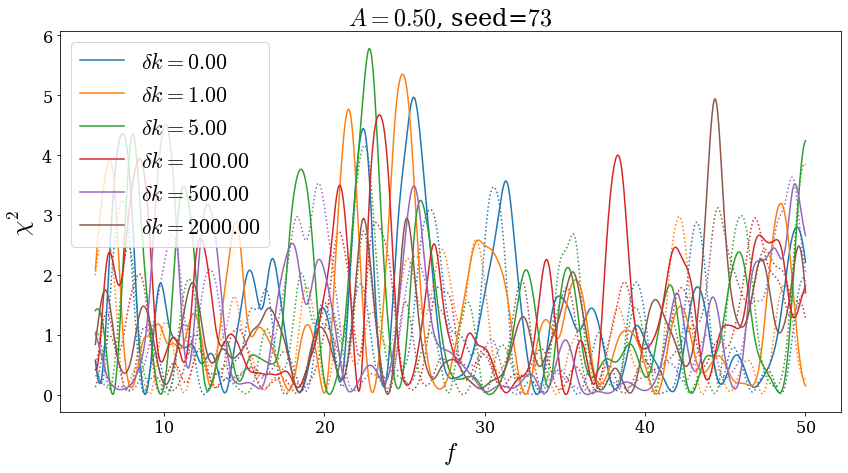

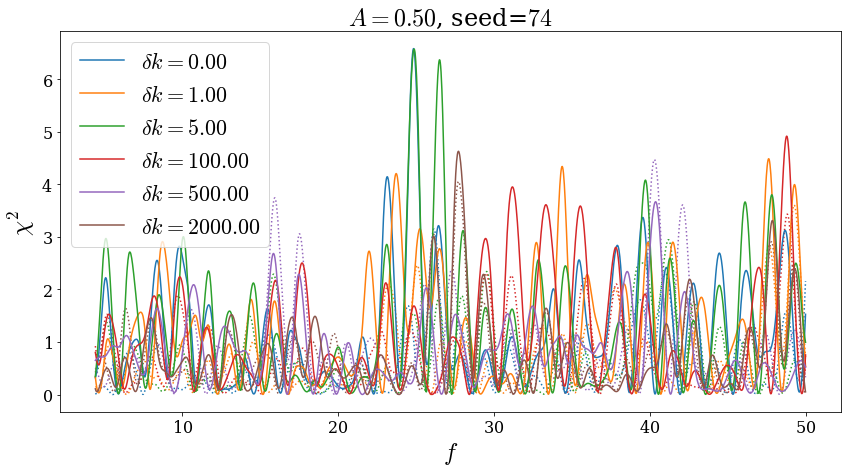

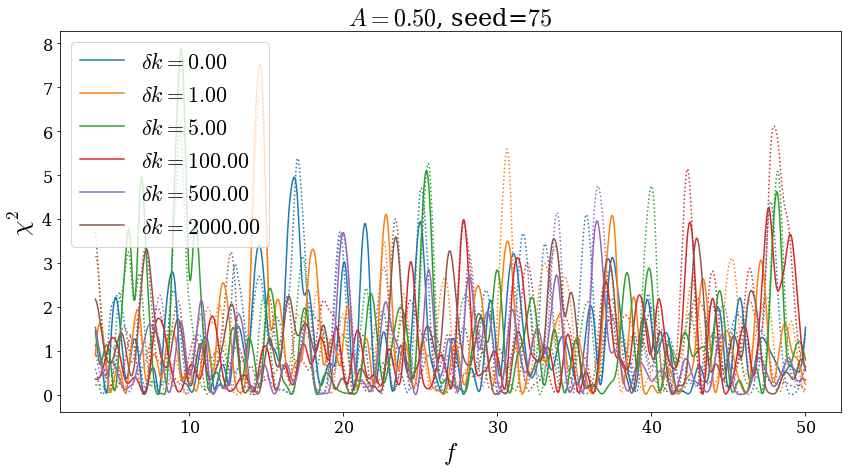

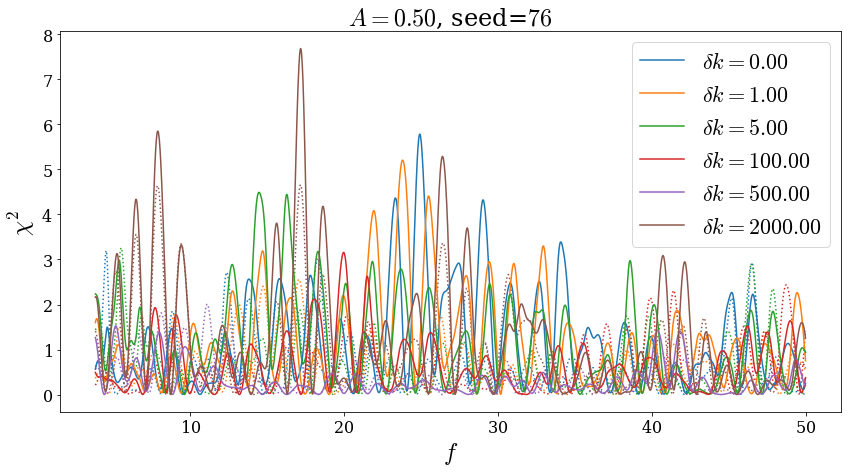

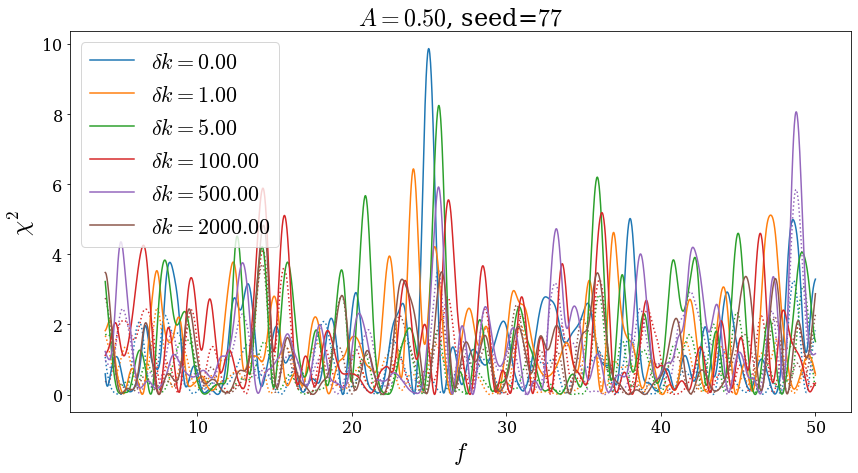

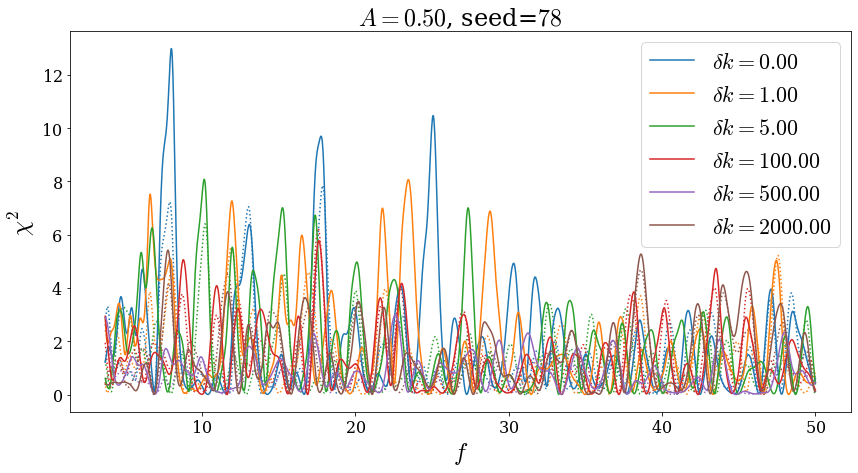

In [7]:
seeds = range(69,79)   # for 100

# for plot of example periodogram
T = 1
 #t =T * np.linspace(0,1,len_t) # np.random.RandomState(seed).rand(len_t) #np.linspace(0,T,len_t) 
fmaxT = len_t/2
phi = 0
ftrue = fmaxT/2/T

As = [0,0.5]
linestyles = [':','-']
dy = 1


for seed in seeds:
    
    t = generate_times(len_t, T, n_batch, squash, fbg, fib, seed)
    
    if noise_type == 'normal':
        noise = dy * np.random.RandomState(seed).randn(len_t)
    elif noise_type == 'poisson':
        noise = np.random.RandomState(seed).poisson(dy*5, len_t) * 0.2
        noise = noise - np.mean(noise)
    elif noise_type == 'nct':
        from scipy.stats import nct
        noise = nct.rvs(df = 1.55134374, nc = 0.86912289, loc = 1.98435008, scale = 0.71418219/2.5, 
                        size = len_t, 
                        random_state = np.random.RandomState(seed))

    plt.figure(figsize=(14,7))
    for Ai,A in enumerate(As):
        y = A * np.sin(2 * np.pi * ftrue * t + phi) + noise

        ls = LombScargle(t, y, dy, normalization=normalization, fit_mean=False, center_data=False, nterms=nterms)
        freq = ls.autofrequency(minimum_frequency=fminT/T, maximum_frequency=fmaxT/T, samples_per_peak=spp)

        dks = [0, 0.5, 1, 2, 5, 10, 100, 200, 500, 1000, 2000, 5000][::2]
        powers = np.empty(shape=(len(dks), len(freq)))

        for i,dk in enumerate(dks):
            a = 2*dk/T**2
            Df = a * (t - T/2)
            #Df += 1
            powers[i] = ls.power(freq, method='slow_Df', Df=Df)

        for dki,dk in enumerate(dks):
            if Ai == 1:
                plt.plot(freq[150:], powers[dki][150:], color='C%d'%dki, label=r'$\delta k=%0.2f$'%dk, linestyle=linestyles[Ai])
            else:
                plt.plot(freq[150:], powers[dki][150:], color='C%d'%dki, linestyle=linestyles[Ai])
    plt.legend()

    plt.title(r'$A=%.2f$, seed=$%d$'%(A,seed))
    plt.ylabel(r'$\chi^2$')
    plt.xlabel(r'$f$')

In [30]:
# power is 'standard' normalization by default. So convert. Note qL here just means delta chisq
# FIXME could change the normalisation in the above when I call autopower
N = len(t)
dH = 1
dK = 3
Nk = N - dK
#qL = 2 * 0.5 * Nk * (1 - power) ** (0.5 * Nk - 1)
qL = - 2 * np.log((1 - power) ** (0.5 * Nk))

<ipython-input-30-ec8c8617b3e4>:8: RuntimeWarning: invalid value encountered in power
  qL = - 2 * np.log((1 - power) ** (0.5 * Nk))


In [31]:
qL.max()

nan

In [32]:
peak_ids = find_peaks(power)[0]
peak_freqs = freq[peak_ids]
peak_powers = power[peak_ids]
peak_qLs = qL[peak_ids]

peak_argsort = np.argsort(peak_powers)[::-1]
peak_freqs = peak_freqs[peak_argsort]
peak_powers = peak_powers[peak_argsort]
peak_qLs = peak_qLs[peak_argsort]

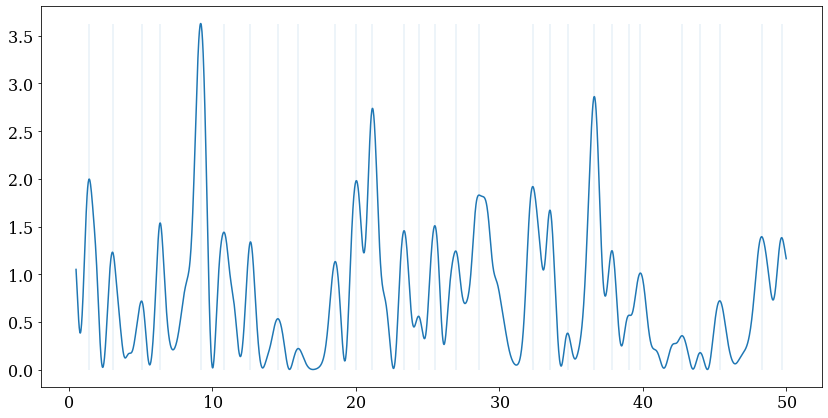

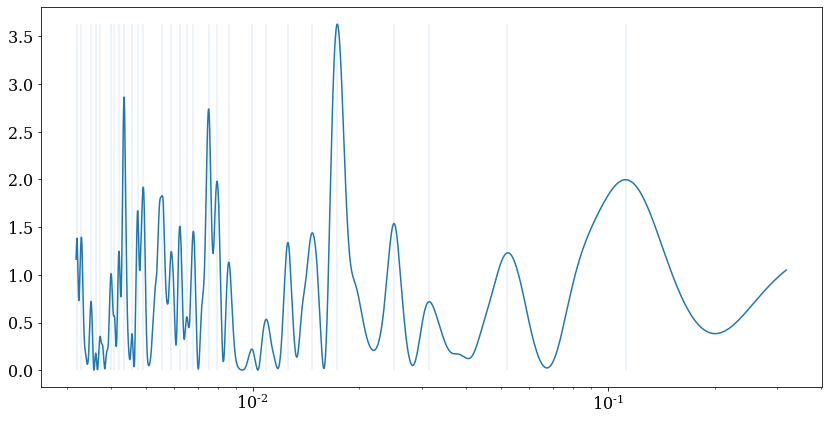

In [33]:
plt.figure(figsize=(14,7))

plt.plot(freq, power)

plt.vlines(peak_freqs, power.min(), power.max(), alpha=0.1)

plt.figure(figsize=(14,7))

plt.plot(1/(2*np.pi*freq), power)
plt.xscale('log')

plt.vlines(1/(2*np.pi*peak_freqs), power.min(), power.max(), alpha=0.1)